In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

ADF test(정상성 확인)

In [2]:
aapl = pd.read_csv("AAPL 과거 데이터.csv")
price = aapl['Close']
log_ret = np.log(price / price.shift(1)).dropna()

In [3]:
result = adfuller(log_ret) 
print(f"ADF: {result[0]}")
print(f"p-value: {result[1]}")


ADF: -9.661165474385305
p-value: 1.3523321429538302e-16


ARMA(1,1) 확인

In [4]:
model = ARIMA(log_ret, order=(1,0,1))
fit = model.fit()
resid = fit.resid

C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, foreca

In [5]:
fit.summary() # AR(1), MA(1) 계수가 유효하지 않음. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  269
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 667.417
Date:                Wed, 07 May 2025   AIC                          -1326.834
Time:                        15:03:58   BIC                          -1312.455
Sample:                             0   HQIC                         -1321.059
                                - 269                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.420      0.675      -0.002       0.003
ar.L1          0.3060      1.305      0.234      0.815      -2.252       2.864
ma.L1         -0.2811      1.314     -0.214      0.831      -2.856       2.294
sigma2         0.0004   1.81e-05     22.583      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1465.86
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.63   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

평균 수준을 상수로 가정하고 ARCH(1), GARCH(1,1) 모형 fitting

In [6]:
from arch import arch_model

arch_model = arch_model(log_ret, mean='constant', vol='Arch', p=1)
arch_fit = arch_model.fit()
print(arch_fit.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1.3870353992158708e+16
Iteration:      2,   Func. Count:     15,   Neg. LLF: 170858130.32513407
Iteration:      3,   Func. Count:     21,   Neg. LLF: -661.0470901204869
Iteration:      4,   Func. Count:     28,   Neg. LLF: -652.5430370626273
Iteration:      5,   Func. Count:     35,   Neg. LLF: -695.9239333073238
Optimization terminated successfully    (Exit mode 0)
            Current function value: -695.9239333073382
            Iterations: 5
            Function evaluations: 35
            Gradient evaluations: 5
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                695.924
Distribution:                  Normal   AIC:                          -1385.85
Method:            Maximum L

C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00041. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [15]:
from arch import arch_model

garch_model = arch_model(log_ret, mean='constant', vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15026910.980680782
Iteration:      2,   Func. Count:     17,   Neg. LLF: 830767.543735183
Iteration:      3,   Func. Count:     26,   Neg. LLF: 21726534.962447315
Iteration:      4,   Func. Count:     36,   Neg. LLF: -697.2266737650475
Optimization terminated successfully    (Exit mode 0)
            Current function value: -697.2266740200637
            Iterations: 8
            Function evaluations: 36
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                697.227
Distribution:                  Normal   AIC:                          -1386.45
Method:            Maximum Likelihood   BIC:                          -1372.07
                            

C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00041. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


변동성 클러스터링(군집) 현상을 고려하였을 때 GARCH(1,1) 모형이 더 적합

몬테 카를로 시뮬레이션

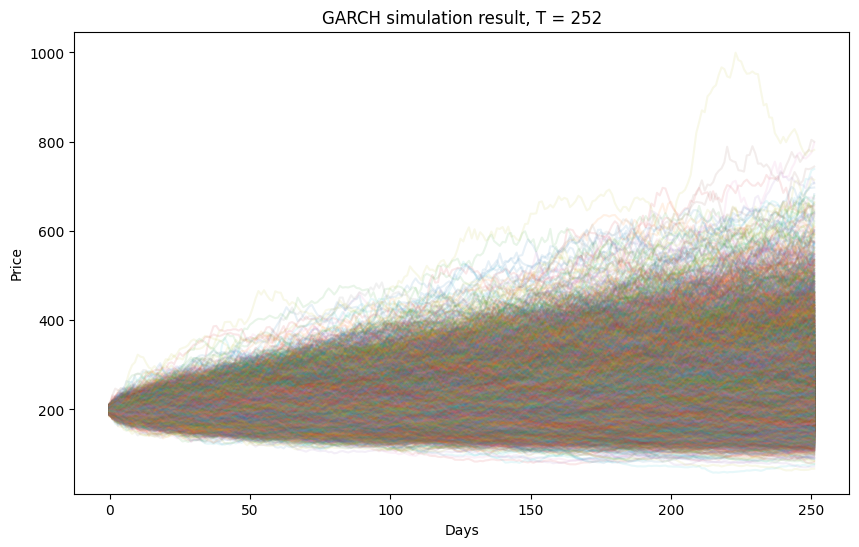

In [11]:
import matplotlib.pyplot as plt
mu = garch_fit.params['mu']
omega = garch_fit.params['omega']
alpha = garch_fit.params['alpha[1]']
beta = garch_fit.params['beta[1]']


T = 252             
n_sim = 10000      
S0 = price.iloc[-1] 


simulated_prices = np.zeros((T, n_sim))

for i in range(n_sim):
    eps = np.zeros(T)
    sigma2 = np.zeros(T)
    ret = np.zeros(T)
    

    sigma2[0] = omega / (1 - alpha - beta)
    eps[0] = np.sqrt(sigma2[0]) * np.random.normal()
    ret[0] = mu + eps[0]
    
    for t in range(1, T):
        sigma2[t] = omega + alpha * eps[t-1]**2 + beta * sigma2[t-1]
        eps[t] = np.sqrt(sigma2[t]) * np.random.normal()
        ret[t] = mu + eps[t]
    

    price_path = S0 * np.exp(np.cumsum(ret))
    simulated_prices[:, i] = price_path


plt.figure(figsize=(10, 6))
plt.plot(simulated_prices, alpha=0.1)
plt.title(f"GARCH simulation result, T = {T}")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [52]:
test = pd.DataFrame(simulated_prices)
test.to_csv("simulated_prices_AAPL.csv")

In [56]:
def calculate_drawdown(price_path):

    peak = np.maximum.accumulate(price_path)

    drawdown = (peak - price_path) / peak

    max_drawdown = np.max(drawdown)
    return drawdown, max_drawdown

In [57]:
mdd_list = []

for i in range(n_sim):
    drawdown, max_drawdown = calculate_drawdown(simulated_prices[:, i])
    mdd_list.append(max_drawdown)

mdd_mean = np.mean(mdd_list)
print(f"Average Maximum Drawdown: {mdd_mean:.2%}")

Average Maximum Drawdown: 25.21%
